# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm *k* Najbliższych Sąsiadów (*k*NN)


### Opis
Celem laboratorium jest implementacja klasyfikatora *k* najbliższych sąsiadów - *k*NN (*k Nearest Neighbors*) oraz zapoznanie się z innymi metrykami klasyfikacji.

### Termin
Zadanie należy wykonać tego samego dnia. 

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab02.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana samodzielnie (bez dodatkowych bibliotek).


### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:
* Wczytaj dane.
* **Zaimplementuj klasyfikator *k* najbliższych sąsiadów (*k*NN)** i uruchom predykcję.
* Opisz jak zmieniają się wyniki klasyfikatora dla różnych wartości *k*, dla różnej liczby klas oraz dla różnej liczby cech.
* Wyświetl tablicę pomyłek (*confusion matrix*). W tym przypadku możesz zastosować gotową implementację z biblioteki `scikit-learn` <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>.
* Odszukaj przynajmniej dwie inne (niż accuracy) metryki przytatne w klasyfikacji na stronie <https://scikit-learn.org/stable/modules/model_evaluation.html> i opisz ich wyniki. Wytłumacz czym się różnią i co można z nich odczytać.
* Opisz różnicę wyników klasyfikacji obu algorytmów (NN i *k*NN)?


> UWAGA: Wszystkie wykonane elementy zadania powinny posiadać stosowne komentarze i opisy.

### PONIŻEJ WYKONAJ ZADANIE
### Wczytywanie danych tak jak w poprzednim zadaniu

In [1]:
import numpy as np
import pandas
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

train_dataframe = pandas.DataFrame(train)
test_dataframe = pandas.DataFrame(test)

### Implementacja klasyfikatora k*NN

In [2]:
def get_distance(trained,tested,cechy):
    summary = 0
    for cecha in cechy:
        summary +=pow(tested[cecha]-trained[cecha],2)
    return np.sqrt(summary)

def find_k_min(k,list_to_be_searched):
    sorted_list = sorted(list_to_be_searched)
    return sorted_list[:k]

def most_frequent(list_to_be_searched):
    return max(set(list_to_be_searched), key = list_to_be_searched.count)

def k_nearest_classify(list_of_distances, list_of_k_nearest, list_of_trained_examples):
    temp_list = []
    for dist in list_of_k_nearest:
        temp_list.append(list_of_distances.index(dist))
    k_nearest_list = []
    for element in temp_list:
        k_nearest_list.append(list_of_trained_examples[element][0])
    return most_frequent(k_nearest_list)

def k_classify(list_of_trained_examples, single_tested_example, k_nearest,list_of_characteristics):
    temp_list = []
    for element in list_of_trained_examples:
        temp_list.append(get_distance(element,single_tested_example,list_of_characteristics))
    list_of_k_nearest = find_k_min(k_nearest,temp_list)
    classified = k_nearest_classify(temp_list,list_of_k_nearest,list_of_trained_examples)
    return single_tested_example, classified



list_of_characters =[2,3,4,5,6,7,8,10,11]
list_of_classes = [3,5,6]
list_of_classifed = []
selectedClassesTrained = train_dataframe.loc[train_dataframe[0].isin(list_of_classes),:]
selectedClassesTest = test_dataframe.loc[test_dataframe[0].isin(list_of_classes),:]
selectedClassesTrained=selectedClassesTrained.to_numpy()
selectedClassesTest=selectedClassesTest.to_numpy()
how_many_neighbours = 10
for to_be_tested in selectedClassesTest:
    list_of_classifed.append(k_classify(selectedClassesTrained,to_be_tested,how_many_neighbours,list_of_characters))

counter = 0
for el in list_of_classifed:
    if int(el[0][0]) == int(el[1]):
        counter+=1
accuracy = counter/len(list_of_classifed)
print("ilość dobrze oznaczonych: "+counter.__str__())
print("ilość wszystkich:" +len(list_of_classifed).__str__())
print("procent dokładności: "+format(accuracy*100,'.2f').__str__()+"%")

ilość dobrze oznaczonych: 150
ilość wszystkich:154
procent dokładności: 97.40%


### Wnioski

In [3]:
# Im więcej sąsiadów rozpatrujemy tym lepiej sklasyfikowane będą próbki testowe ale czas wykonywania wzrośnie
# Co do ilości cech to im więcej ich podamy tym drastyczniej wzrośnie czas wykonywania jednakże dokładność już
# niekoniecznie, zbyt duża ilość cech po których wyszukujemy może powodować problemy z dopasowaniem dla programu

### confusion matrix

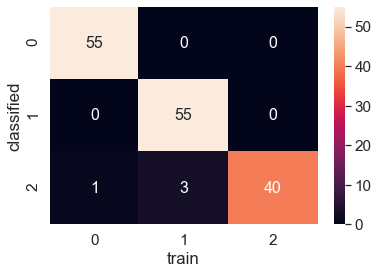

In [8]:
confusion_list =[]
confusion_train =[]
for a in list_of_classifed:
    temp = int(a[1])
    confusion_list.append(temp)
    temp1 = int(a[0][0])
    confusion_train.append(temp1)

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(confusion_train,confusion_list)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(conf, range(np.shape(conf)[0]), range(np.shape(conf)[1]))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel("train")
plt.ylabel("classified")
plt.show()

### Inne metryki

In [5]:
from sklearn.metrics import jaccard_score,zero_one_loss

# zero one loss zwraca ułamek wskazujący stosunek źle sklasyfikowanych obiektów jest to prosta metryka ale przydatna
zero_one_loss_result = zero_one_loss(confusion_train,confusion_list)
print(zero_one_loss_result)

# jaccard score zwraca rozmiar intersekcji obu zbiorów podzielony przez rozmiar ich unii
score = jaccard_score(confusion_train,confusion_list ,average=None)
print(score)


0.025974025974025983
[0.98214286 0.94827586 0.90909091]


### Różnica między kNN a NN

In [6]:
# Algrorytm NN różni się od kNN ilością branych pod uwagę próbek przy porównaniu klas, NN sprawdzi się w przypadkach
# gdzie nie jest potrzebna najwyższa dokładność ale potrzebne są ograniczenia w obliczeniach
# kNN przez to że jest bardziej wymagający obliczeniowo ale zarazem
# dokładniejszy sprawdzi się w innych przypadkach,
# jednakże podając jako k=1 otrzymamy z obu takie same wyniki
